In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

100% 6.23M/6.23M [00:00<00:00, 22.7MB/s]
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 86.2MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 247.3ms
Speed: 24.5ms preprocess, 247.3ms inference, 29.9ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


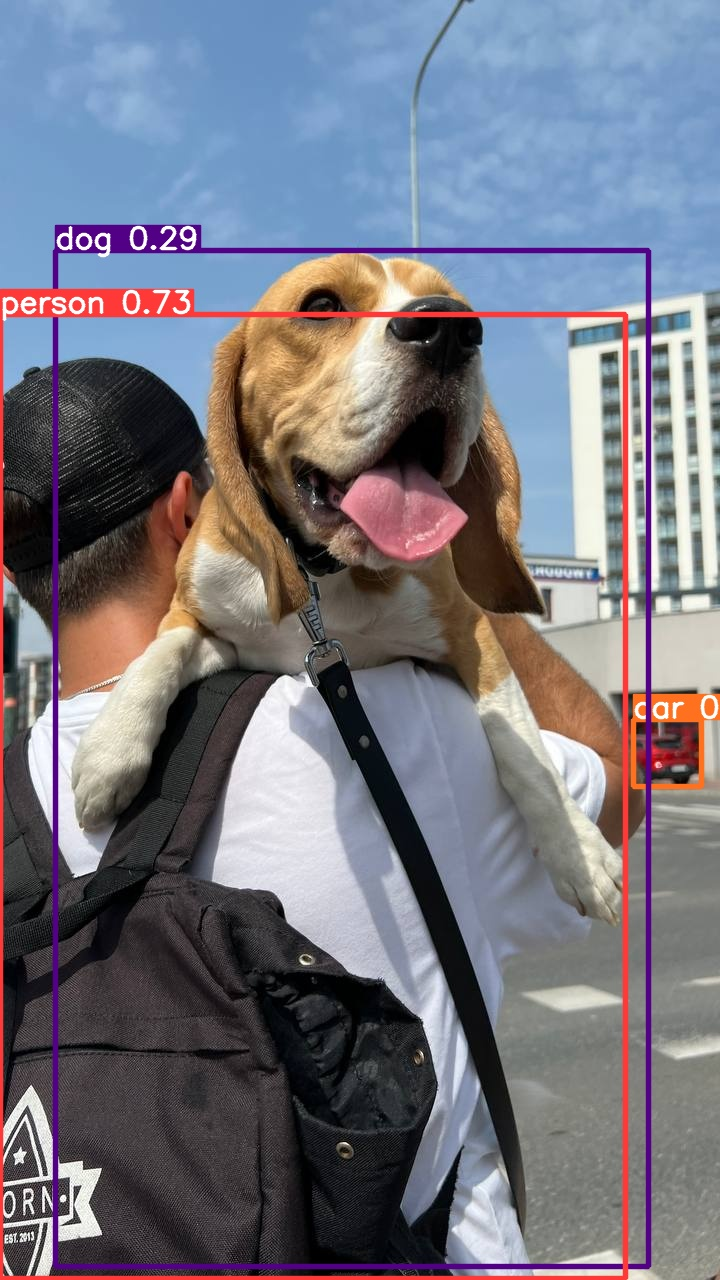

In [ ]:
Image(filename='runs/detect/predict/dog.jpeg', height=600)

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="zpF7NSPYRcSrsjMnOrpo")
project = rf.workspace("tanzim-mostafa").project("p2_dhaka_dataset-f6ba6")
version = project.version(29)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to P2_Dhaka_Dataset-29 in yolov8:: 100%|██████████| 10172/10172 [00:05<00:00, 1966.25it/s]


In [ ]:
!unzip /content/run_train.zip -d /content/


In [ ]:
!ls /content/content/runs/detect/train7

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1718034510.87cd521393d4.9356.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch5600.jpg  weights
P_curve.png					    train_batch5601.jpg
PR_curve.png					    train_batch5602.jpg


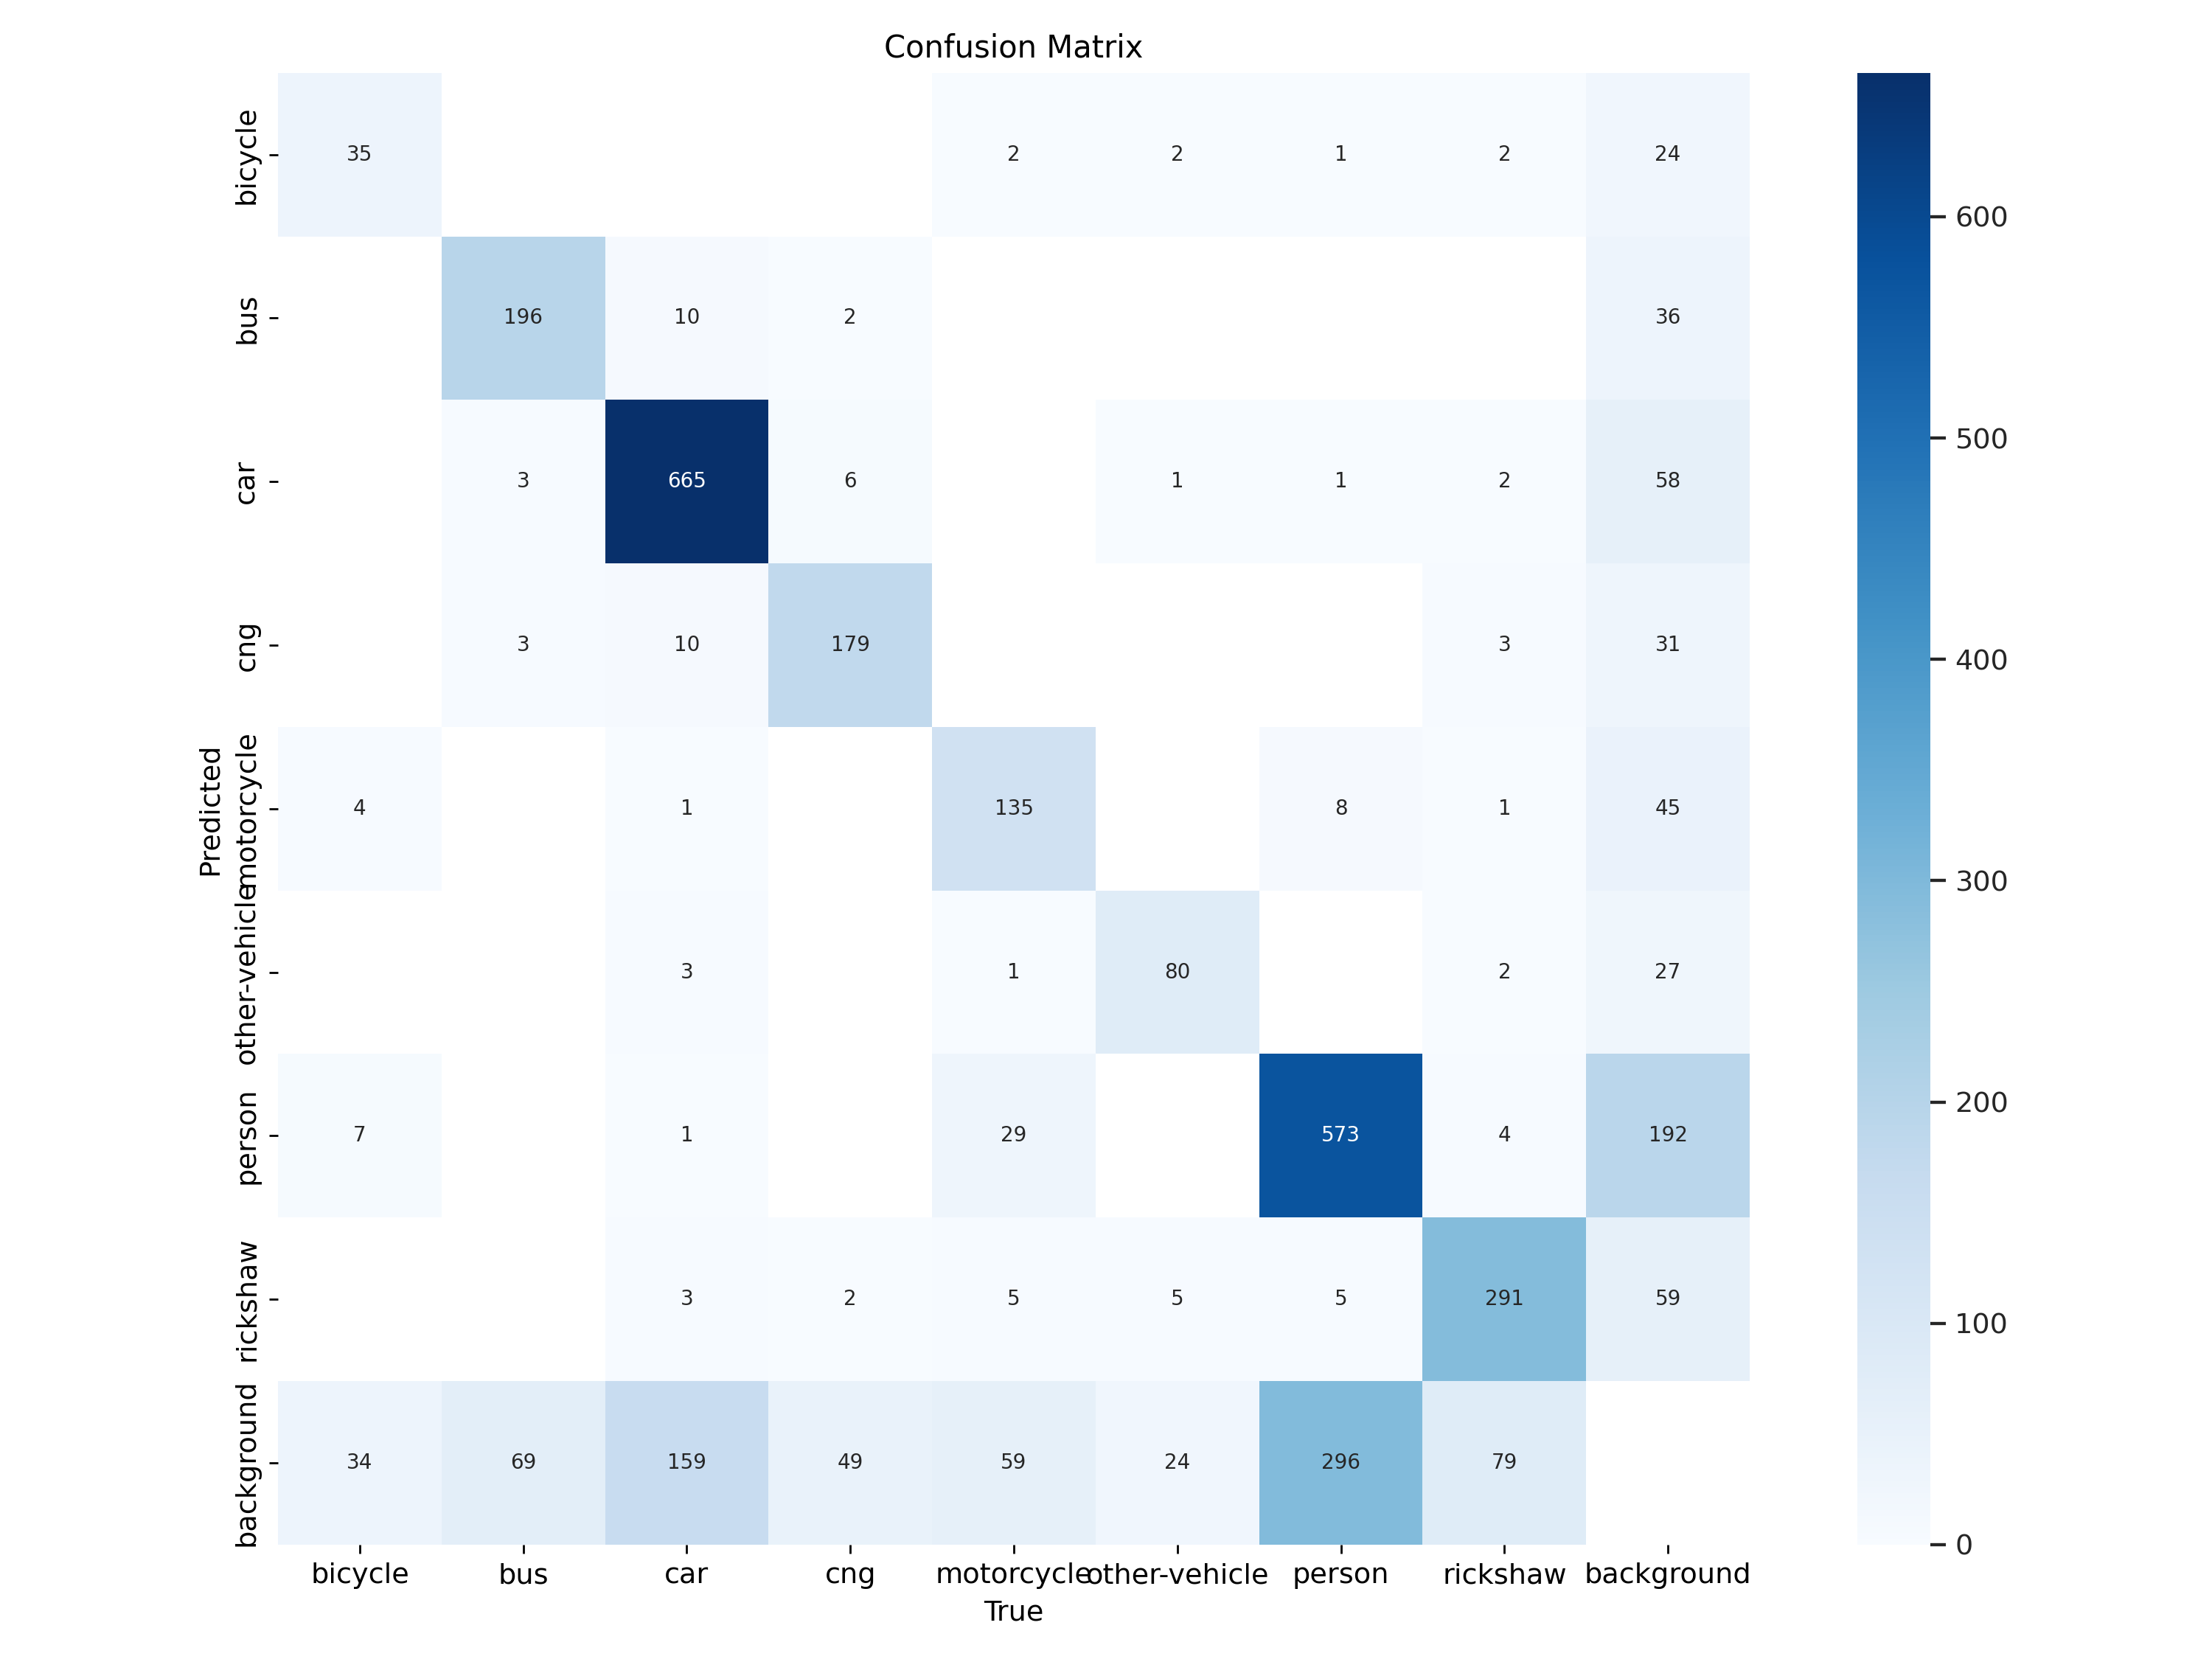

In [ ]:
Image(filename=f'content/runs/detect/train7/confusion_matrix.png', width=600)

In [ ]:
import pandas as pd

# Đọc dữ liệu từ tệp CSV vào DataFrame
df = pd.read_csv('/content/content/runs/detect/train7/results.csv')


In [ ]:
# In ra một số hàng đầu tiên của DataFrame
print(df.head())

# In ra một số hàng cuối cùng của DataFrame
print(df.tail())


                     epoch           train/box_loss           train/cls_loss  \
0                        1                   1.1256                  1.24970   
1                        2                   1.1204                  0.98337   
2                        3                   1.1164                  0.94631   
3                        4                   1.0832                  0.89068   
4                        5                   1.0347                  0.81699   

            train/dfl_loss     metrics/precision(B)        metrics/recall(B)  \
0                   1.1452                  0.60237                  0.54069   
1                   1.1528                  0.65169                  0.52061   
2                   1.1521                  0.74287                  0.52698   
3                   1.1378                  0.68340                  0.60421   
4                   1.1089                  0.76222                  0.59734   

          metrics/mAP50(B)      metric

In [ ]:

# Xử lý dữ liệu thiếu (nếu có)
df = df.dropna()  # Loại bỏ các hàng có dữ liệu thiếu


In [ ]:
column_types = df.dtypes
print("Các loại dữ liệu của từng cột là:")
print(column_types)


Các loại dữ liệu của từng cột là:
                  epoch      int64
         train/box_loss    float64
         train/cls_loss    float64
         train/dfl_loss    float64
   metrics/precision(B)    float64
      metrics/recall(B)    float64
       metrics/mAP50(B)    float64
    metrics/mAP50-95(B)    float64
           val/box_loss    float64
           val/cls_loss    float64
           val/dfl_loss    float64
                 lr/pg0    float64
                 lr/pg1    float64
                 lr/pg2    float64
dtype: object


                         epoch           train/box_loss  \
count                30.000000                30.000000   
mean                 15.500000                 0.795529   
std                   8.803408                 0.194153   
min                   1.000000                 0.505650   
25%                   8.250000                 0.628870   
50%                  15.500000                 0.781595   
75%                  22.750000                 0.936065   
max                  30.000000                 1.125600   

                train/cls_loss           train/dfl_loss  \
count                30.000000                30.000000   
mean                  0.573416                 0.988553   
std                   0.232155                 0.094750   
min                   0.306630                 0.858210   
25%                   0.380918                 0.905038   
50%                   0.524115                 0.977140   
75%                   0.685852                 1.055250

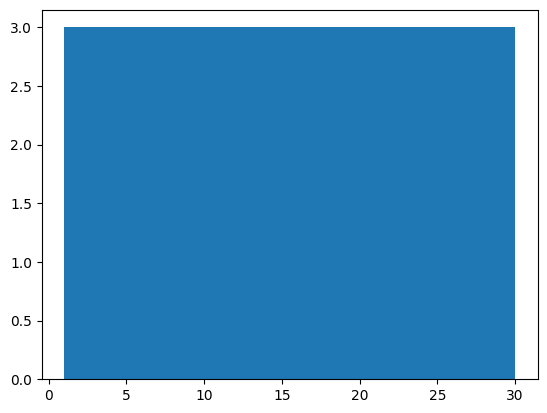

In [ ]:
# Tính toán các thống kê mô tả
print(df.describe())

# Tạo biểu đồ để hiểu về phân phối của các biến
import matplotlib.pyplot as plt
plt.hist(df['                  epoch'])
plt.show()

# # Tìm kiếm mối quan hệ giữa các biến
# plt.scatter(df['column1'], df['column2'])
# plt.xlabel('Column 1')
# plt.ylabel('Column 2')
# plt.title('Relationship between Column 1 and Column 2')
# plt.show()


In [ ]:
print(df.columns)


Index(['                  epoch', '         train/box_loss',
       '         train/cls_loss', '         train/dfl_loss',
       '   metrics/precision(B)', '      metrics/recall(B)',
       '       metrics/mAP50(B)', '    metrics/mAP50-95(B)',
       '           val/box_loss', '           val/cls_loss',
       '           val/dfl_loss', '                 lr/pg0',
       '                 lr/pg1', '                 lr/pg2'],
      dtype='object')


In [ ]:
# column_types = df.dtypes
print("Các loại dữ liệu của từng cột là:")
print(column_types)

Các loại dữ liệu của từng cột là:
epoch                     int64
train/box_loss          float64
train/cls_loss          float64
train/dfl_loss          float64
metrics/precision(B)    float64
metrics/recall(B)       float64
metrics/mAP50(B)        float64
metrics/mAP50-95(B)     float64
val/box_loss            float64
val/cls_loss            float64
val/dfl_loss            float64
lr/pg0                  float64
lr/pg1                  float64
lr/pg2                  float64
dtype: object


In [ ]:
import pandas as pd

# Đọc dữ liệu từ tệp CSV vào DataFrame
df = pd.read_csv('/content/content/runs/detect/train7/results.csv')

# Loại bỏ dấu cách ở đầu và cuối của tên cột
df.columns = df.columns.str.strip()

# In ra tên cột sau khi loại bỏ dấu cách
print(df.columns)


Index(['epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


đỒ THỊ MẤT MÁT CỦA YOLO

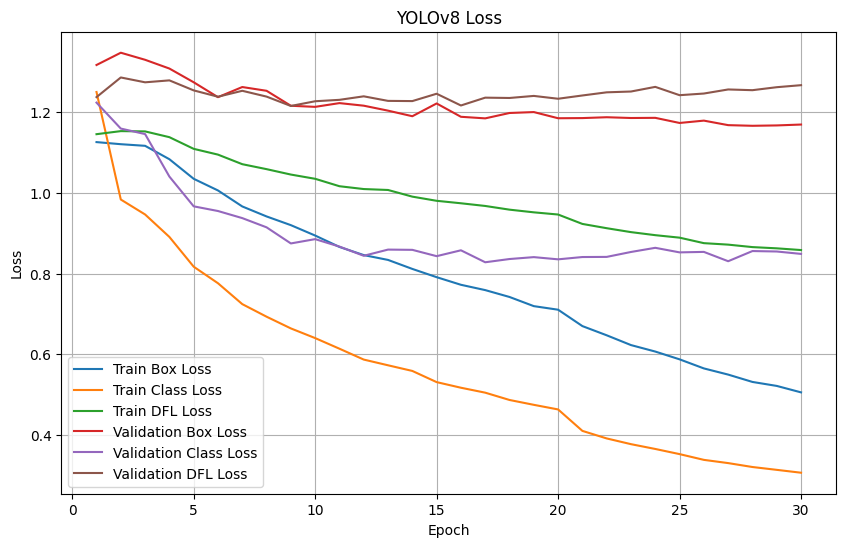

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tệp CSV vào DataFrame
df = pd.read_csv('/content/content/runs/detect/train7/results.csv')
df.columns = df.columns.str.strip()

# Trích xuất các thông số mất mát
epochs = df['epoch']
train_box_loss = df['train/box_loss']
train_cls_loss = df['train/cls_loss']
train_dfl_loss = df['train/dfl_loss']
val_box_loss = df['val/box_loss']
val_cls_loss = df['val/cls_loss']
val_dfl_loss = df['val/dfl_loss']

# Vẽ đồ thị mất mát
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_box_loss, label='Train Box Loss')
plt.plot(epochs, train_cls_loss, label='Train Class Loss')
plt.plot(epochs, train_dfl_loss, label='Train DFL Loss')
plt.plot(epochs, val_box_loss, label='Validation Box Loss')
plt.plot(epochs, val_cls_loss, label='Validation Class Loss')
plt.plot(epochs, val_dfl_loss, label='Validation DFL Loss')
plt.title('YOLOv8 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Đọc file CSV
file_path = '/content/drive/MyDrive/content/runs/detect/train7/results.csv'
results_df = pd.read_csv(file_path)


In [ ]:
import pandas as pd

# Đọc file CSV
file_path = '/content/drive/MyDrive/content/runs/detect/train7/results.csv'
results_df = pd.read_csv(file_path)

# Loại bỏ khoảng cách ở trước mỗi tên cột
results_df.columns = results_df.columns.str.strip()

# Kiểm tra các tên cột và vài dòng đầu tiên của DataFrame
print(results_df.columns)
print(results_df.head())


Index(['epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')
   epoch  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1          1.1256         1.24970          1.1452   
1      2          1.1204         0.98337          1.1528   
2      3          1.1164         0.94631          1.1521   
3      4          1.0832         0.89068          1.1378   
4      5          1.0347         0.81699          1.1089   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.60237            0.54069           0.58037   
1               0.65169            0.52061           0.58766   
2               0.74287            0.52698           0.61934   
3               0.68340            0.60421           0.64881   
4               0.76222            0.59

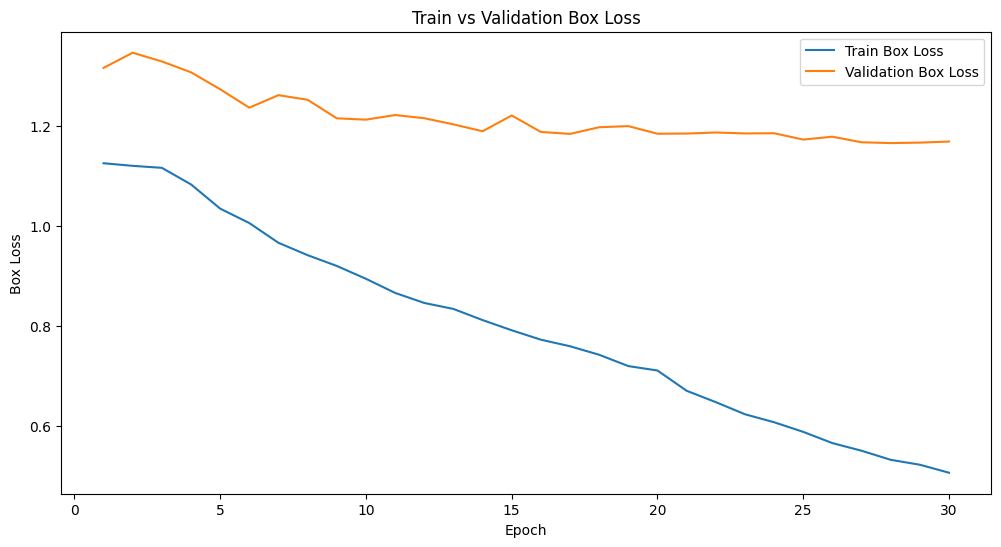

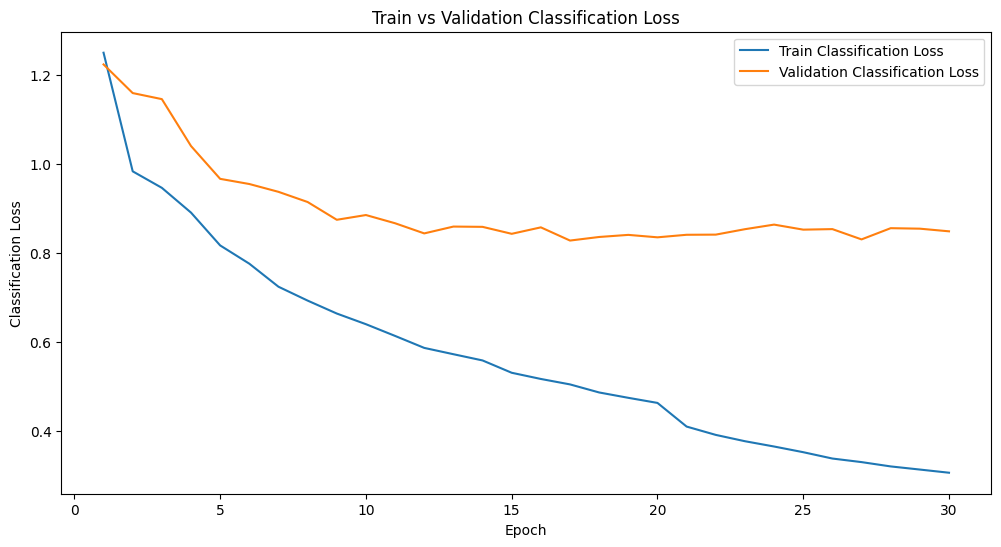

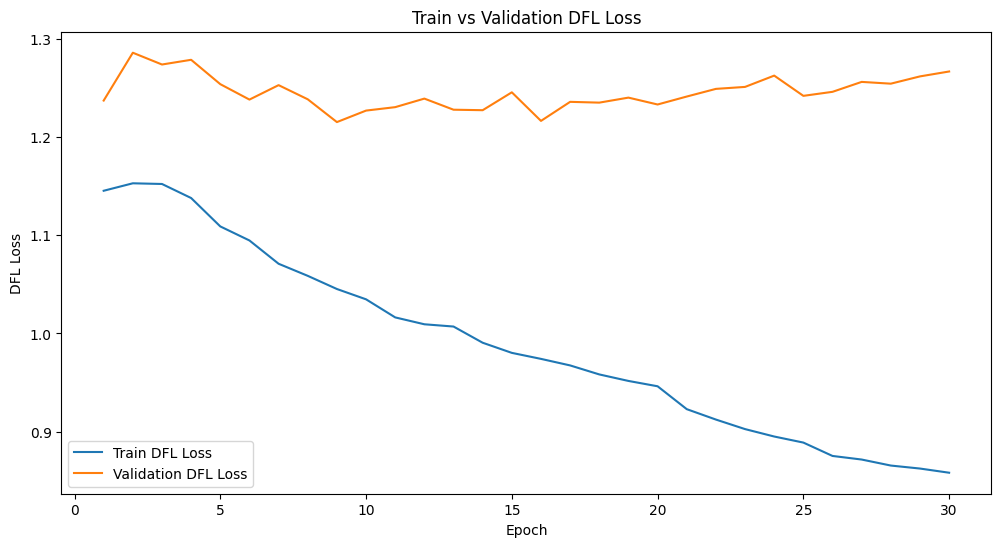

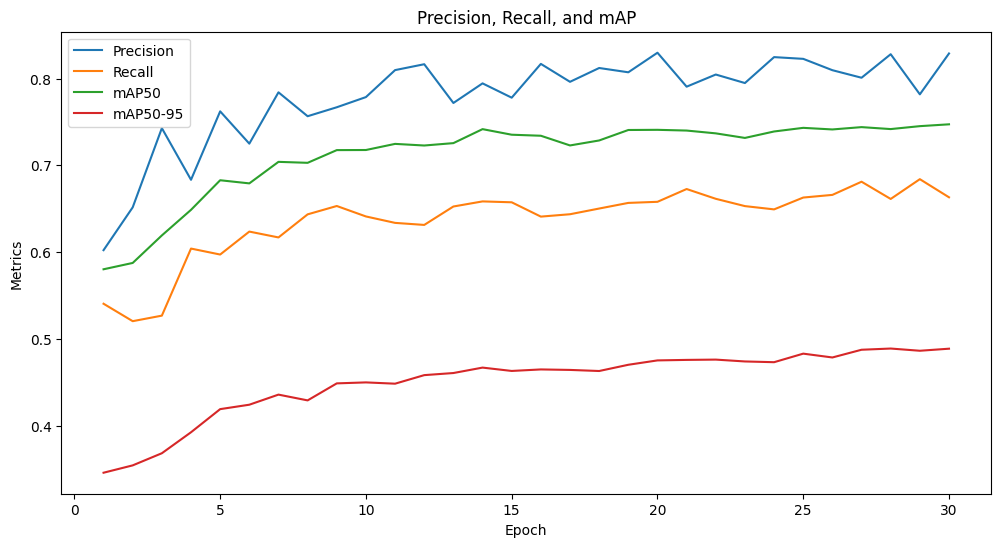

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc file CSV và loại bỏ khoảng trắng ở tên cột
file_path = '/content/drive/MyDrive/content/runs/detect/train7/results.csv'
results_df = pd.read_csv(file_path)
results_df.columns = results_df.columns.str.strip()

# Vẽ train/box_loss và val/box_loss theo epoch
plt.figure(figsize=(12, 6))
plt.plot(results_df['epoch'], results_df['train/box_loss'], label='Train Box Loss')
plt.plot(results_df['epoch'], results_df['val/box_loss'], label='Validation Box Loss')
plt.xlabel('Epoch')
plt.ylabel('Box Loss')
plt.title('Train vs Validation Box Loss')
plt.legend()
plt.show()

# Vẽ train/cls_loss và val/cls_loss theo epoch
plt.figure(figsize=(12, 6))
plt.plot(results_df['epoch'], results_df['train/cls_loss'], label='Train Classification Loss')
plt.plot(results_df['epoch'], results_df['val/cls_loss'], label='Validation Classification Loss')
plt.xlabel('Epoch')
plt.ylabel('Classification Loss')
plt.title('Train vs Validation Classification Loss')
plt.legend()
plt.show()

# Vẽ train/dfl_loss và val/dfl_loss theo epoch
plt.figure(figsize=(12, 6))
plt.plot(results_df['epoch'], results_df['train/dfl_loss'], label='Train DFL Loss')
plt.plot(results_df['epoch'], results_df['val/dfl_loss'], label='Validation DFL Loss')
plt.xlabel('Epoch')
plt.ylabel('DFL Loss')
plt.title('Train vs Validation DFL Loss')
plt.legend()
plt.show()

# Vẽ precision, recall, và mAP theo epoch
plt.figure(figsize=(12, 6))
plt.plot(results_df['epoch'], results_df['metrics/precision(B)'], label='Precision')
plt.plot(results_df['epoch'], results_df['metrics/recall(B)'], label='Recall')
plt.plot(results_df['epoch'], results_df['metrics/mAP50(B)'], label='mAP50')
plt.plot(results_df['epoch'], results_df['metrics/mAP50-95(B)'], label='mAP50-95')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.title('Precision, Recall, and mAP')
plt.legend()
plt.show()


Mean Precision: 0.7790969999999999
Mean Recall: 0.636935
Mean mAP: 0.7122953333333335


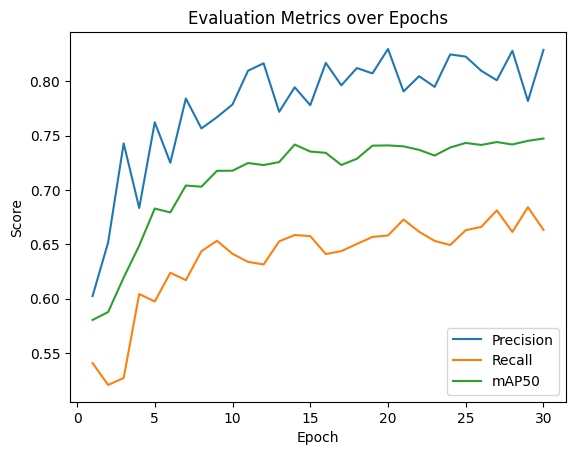

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/content/runs/detect/train7/results.csv'
evaluation_results = pd.read_csv(file_path)
evaluation_results.columns = results_df.columns.str.strip()

# Đọc dữ liệu đánh giá từ DataFrame
# evaluation_results = pd.read_csv('/content/drive/MyDrive/content/runs/detect/train7/results.csv')

# Tính trung bình của các metrics qua các epoch
mean_precision = evaluation_results['metrics/precision(B)'].mean()
mean_recall = evaluation_results['metrics/recall(B)'].mean()
mean_mAP = evaluation_results['metrics/mAP50(B)'].mean()

# Hiển thị kết quả đánh giá
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean mAP:", mean_mAP)

# Hiển thị biểu đồ cho các metrics qua các epoch
plt.plot(evaluation_results['epoch'], evaluation_results['metrics/precision(B)'], label='Precision')
plt.plot(evaluation_results['epoch'], evaluation_results['metrics/recall(B)'], label='Recall')
plt.plot(evaluation_results['epoch'], evaluation_results['metrics/mAP50(B)'], label='mAP50')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Evaluation Metrics over Epochs')
plt.legend()
plt.show()


In [ ]:
!yolo val model=/content/content/runs/detect/train7/weights/best.pt data=coco8.yaml imgsz=640 batch=16 conf=0.25 iou=0.6 device=0

In [ ]:
!unrar x /content/data.rar -d /content


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/data.rar

Extracting  /content/data.yaml                                           100%  OK 
All OK
